Problem Statement:

Clustering:

Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset.

CPC = Total Cost (spend) / Number of Clicks. Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset.

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset.

The Data Dictionary and the detailed description of the formulas for CPM, CPC and CTR are given in the sheet 2 of the Clustering Clean ads_data Excel File.

Perform the following in given order:

Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc. Treat missing values in CPC, CTR and CPM using the formula given. You may refer to the Bank_KMeans Solution FileView in a new window to understand the coding behind treating the missing values using a specific formula. You have to basically create an user defined function and then call the function for imputing. Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst). Perform z-score scaling and discuss how it affects the speed of the algorithm. Perform clustering and do the following: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance. Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm. Print silhouette scores for up to 10 clusters and identify optimum number of clusters. Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots.] Conclude the project by providing summary of your learnings.

Perform the following in given order: 1.1 Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

Part 1: Clustering: Define the problem and perform Exploratory Data Analysis

Problem definition - Check shape, Data types, statistical summary - Univariate analysis - Bivariate analysis - Key meaningful observations on individual variables and the relationship between variables


In [1]:
#Load the required packages
import pandas as pd
import numpy as np

In [2]:
ClusteringCleansData=pd.read_excel('D:/Ment Class/Practise11/Excel Data/TSF/PowerBI/DWNLDS/CV/MRA Project/MRA Project/XLSX File for practice/ClusteringCleansData.xlsx')

In [3]:
ClusteringCleansData.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [4]:
ClusteringCleansData.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [5]:
ClusteringCleansData.shape

(23066, 19)

In [6]:
ClusteringCleansData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [7]:
ClusteringCleansData.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,18330.000000,18330.000000,18330.000000
mean,385.163097,337.896037,96674.468048,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,0.073661,7.672045,0.351061
std,233.651434,203.092885,61538.329557,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,0.075160,6.481391,0.343334
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000100,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.002600,1.710000,0.090000
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.082550,7.660000,0.160000
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.130000,12.510000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


In [9]:
ClusteringCleansData.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [11]:
ClusteringCleansData.duplicated().sum()

0

In [13]:
# treat missing values
def impute_missing(ClusteringCleansData, col1, col2, col3):

    ClusteringCleansData[col1] =  ClusteringCleansData[col1].fillna(( ClusteringCleansData[col1].mean()))

    ClusteringCleansData[col2] =  ClusteringCleansData[col2].fillna((ClusteringCleansData[col2].mean()))

    ClusteringCleansData[col3] =  ClusteringCleansData[col3].fillna((ClusteringCleansData[col3].mean()))

    

    return ClusteringCleansData

In [14]:
impute_missing(ClusteringCleansData, 'CPC', 'CTR', 'CPM')


,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0000,0.003100,0.000000,0.000000
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0000,0.003500,0.000000,0.000000
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0000,0.002800,0.000000,0.000000
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0000,0.002000,0.000000,0.000000
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0000,0.004100,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,0.073661,7.672045,0.351061
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,0.073661,7.672045,0.351061
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,0.073661,7.672045,0.351061
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,0.073661,7.672045,0.351061


Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).



In [16]:
ClusteringCleansData =ClusteringCleansData.drop(['Timestamp','InventoryType','Ad Type','Platform','Device Type','Format'], axis=1)
ClusteringCleansData


,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.00,0.35,0.0000,0.003100,0.000000,0.000000
1,300,250,75000,1780,285,285,1,0.00,0.35,0.0000,0.003500,0.000000,0.000000
2,300,250,75000,2727,356,355,1,0.00,0.35,0.0000,0.002800,0.000000,0.000000
3,300,250,75000,2430,497,495,1,0.00,0.35,0.0000,0.002000,0.000000,0.000000
4,300,250,75000,1218,242,242,1,0.00,0.35,0.0000,0.004100,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,0.073661,7.672045,0.351061
23062,720,300,216000,3,2,2,1,0.04,0.35,0.0260,0.073661,7.672045,0.351061
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,0.073661,7.672045,0.351061
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,0.073661,7.672045,0.351061


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

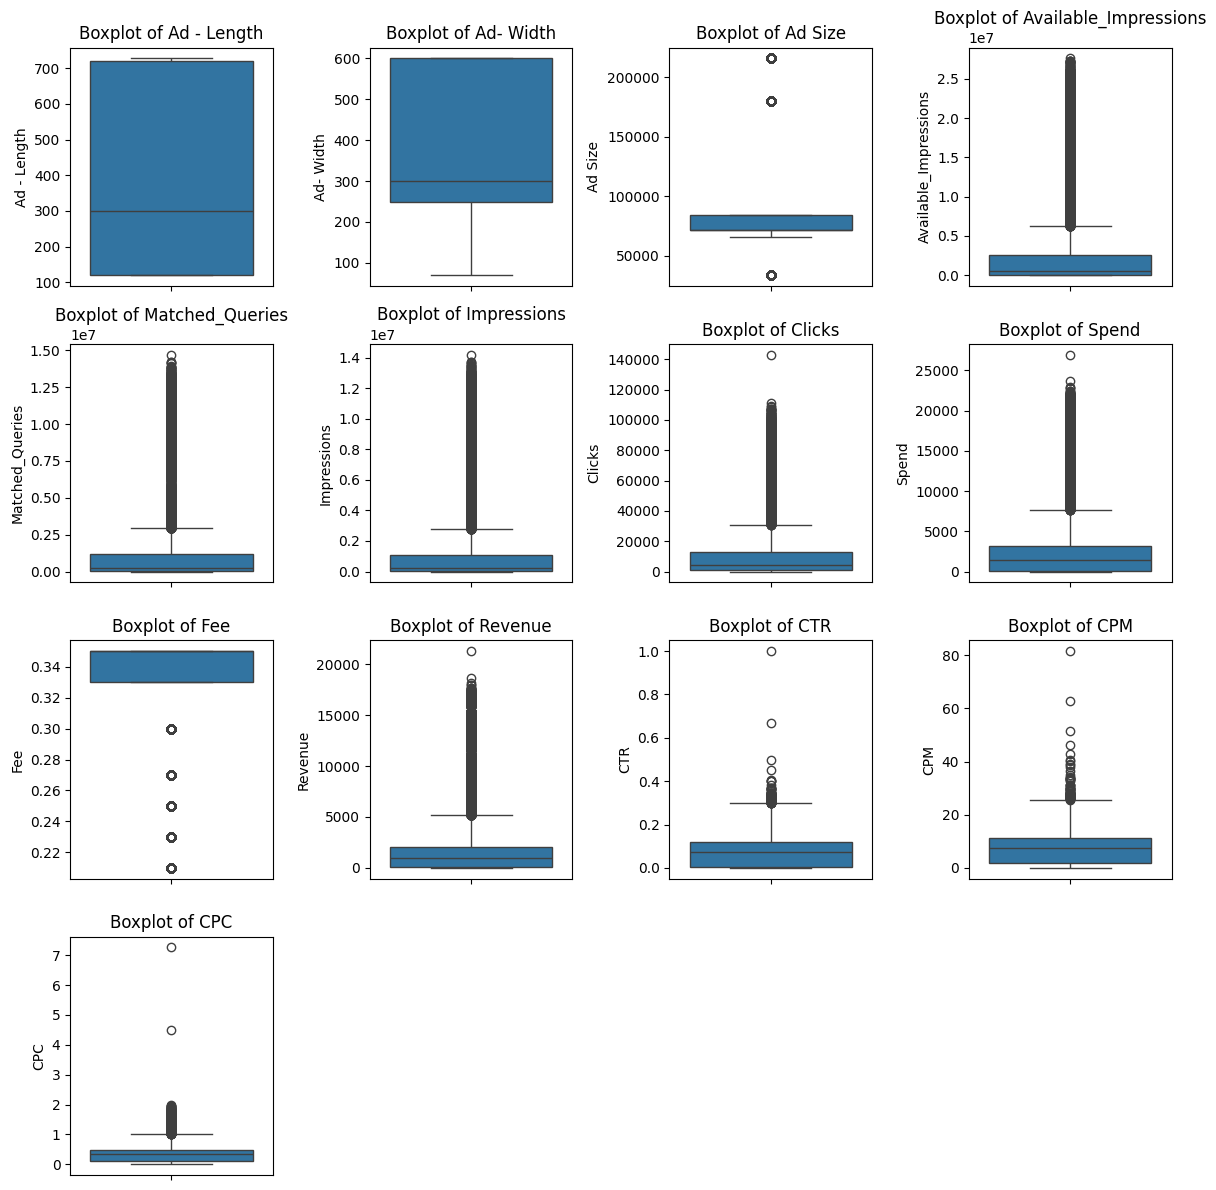

In [19]:
plt.figure(figsize=(12, 12))  
feature_list = ClusteringCleansData.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)  # Adjust the grid size
    sns.boxplot(y=ClusteringCleansData[feature_list[i]], data=ClusteringCleansData)
    plt.title('Boxplot of {}'.format(feature_list[i]))

plt.tight_layout()
plt.show()

In [20]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [21]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(ClusteringCleansData[i])
    ClusteringCleansData[i] = np.where(ClusteringCleansData[i] > UL, UL,ClusteringCleansData[i])
    ClusteringCleansData[i] = np.where(ClusteringCleansData[i] < LL, LL,ClusteringCleansData[i])

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

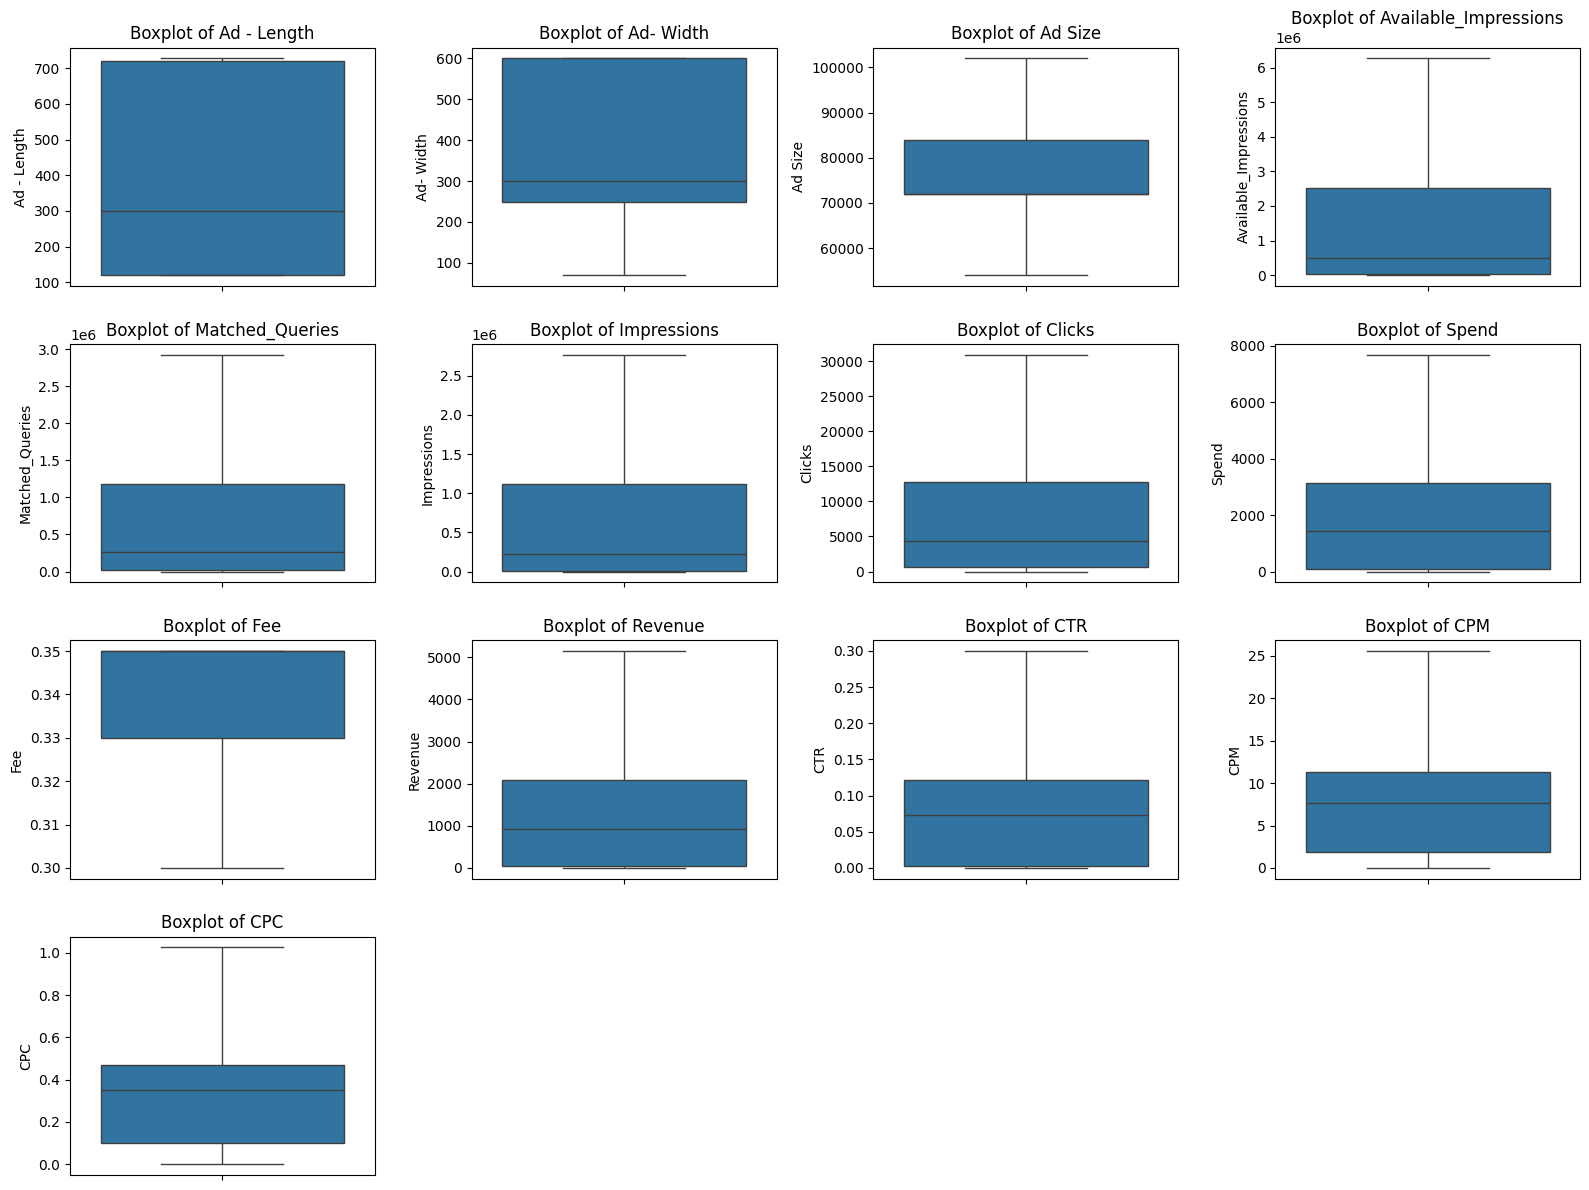

In [23]:
plt.figure(figsize=(16, 12))
feature_list = ClusteringCleansData.columns
num_features = len(feature_list)
grid_size = (4, 4)
num_subplots = min(num_features, grid_size[0] * grid_size[1])
for i in range(num_subplots):
    plt.subplot(grid_size[0], grid_size[1], i + 1)
    sns.boxplot(y=ClusteringCleansData[feature_list[i]], data=ClusteringCleansData)
    plt.title('Boxplot of {}'.format(feature_list[i]))

plt.tight_layout()
plt.show()

Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [24]:
ClusteringCleansData =ClusteringCleansData.drop(['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format'], axis=1, errors='ignore')


In [25]:
ClusteringCleansData

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300.0,250.0,75000.0,1806.0,325.0,323.0,1.0,0.00,0.35,0.0000,0.003100,0.000000,0.000000
1,300.0,250.0,75000.0,1780.0,285.0,285.0,1.0,0.00,0.35,0.0000,0.003500,0.000000,0.000000
2,300.0,250.0,75000.0,2727.0,356.0,355.0,1.0,0.00,0.35,0.0000,0.002800,0.000000,0.000000
3,300.0,250.0,75000.0,2430.0,497.0,495.0,1.0,0.00,0.35,0.0000,0.002000,0.000000,0.000000
4,300.0,250.0,75000.0,1218.0,242.0,242.0,1.0,0.00,0.35,0.0000,0.004100,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720.0,300.0,102000.0,1.0,1.0,1.0,1.0,0.07,0.35,0.0455,0.073661,7.672045,0.351061
23062,720.0,300.0,102000.0,3.0,2.0,2.0,1.0,0.04,0.35,0.0260,0.073661,7.672045,0.351061
23063,720.0,300.0,102000.0,2.0,1.0,1.0,1.0,0.05,0.35,0.0325,0.073661,7.672045,0.351061
23064,120.0,600.0,72000.0,7.0,1.0,1.0,1.0,0.07,0.35,0.0455,0.073661,7.672045,0.351061


In [26]:
def z_score(ClusteringCleansData):
    # copy the dataframe
    ClusteringCleansData_std = ClusteringCleansData.copy()
    # apply the z-score method
    for column in ClusteringCleansData_std.columns:
        ClusteringCleansData_std[column] = (ClusteringCleansData_std[column] -ClusteringCleansData_std[column].mean()) /ClusteringCleansData_std[column].std()
        
    return ClusteringCleansData_std
    
# call the z_score function
ClusteringCleansData = z_score( ClusteringCleansData)
ClusteringCleansData

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364488,-0.432787,-0.102516,-0.755317,-0.778932,-0.768461,-0.867469,-0.893151,0.535713,-0.880074,-1.063585,-1.345049,-1.268701
1,-0.364488,-0.432787,-0.102516,-0.755329,-0.778971,-0.768500,-0.867469,-0.893151,0.535713,-0.880074,-1.057541,-1.345049,-1.268701
2,-0.364488,-0.432787,-0.102516,-0.754883,-0.778902,-0.768428,-0.867469,-0.893151,0.535713,-0.880074,-1.068117,-1.345049,-1.268701
3,-0.364488,-0.432787,-0.102516,-0.755023,-0.778765,-0.768285,-0.867469,-0.893151,0.535713,-0.880074,-1.080203,-1.345049,-1.268701
4,-0.364488,-0.432787,-0.102516,-0.755593,-0.779013,-0.768543,-0.867469,-0.893151,0.535713,-0.880074,-1.048477,-1.345049,-1.268701
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,1.433062,-0.186595,1.652860,-0.756166,-0.779248,-0.768789,-0.867469,-0.893122,0.535713,-0.880047,0.002433,0.003238,0.040330
23062,1.433062,-0.186595,1.652860,-0.756165,-0.779247,-0.768788,-0.867469,-0.893134,0.535713,-0.880058,0.002433,0.003238,0.040330
23063,1.433062,-0.186595,1.652860,-0.756165,-0.779248,-0.768789,-0.867469,-0.893130,0.535713,-0.880054,0.002433,0.003238,0.040330
23064,-1.134866,1.290562,-0.297558,-0.756163,-0.779248,-0.768789,-0.867469,-0.893122,0.535713,-0.880047,0.002433,0.003238,0.040330


Clustering: Hierarchical Clustering

Construct a dendrogram using Ward linkage and Euclidean distance - Identify the optimum number of Clusters.

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np

In [31]:
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, linkage='ward')  # No affinity parameter
model.fit(ClusteringCleansData)
labels = model.labels_

In [32]:
print(labels)

[0 0 0 ... 4 2 4]


In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage


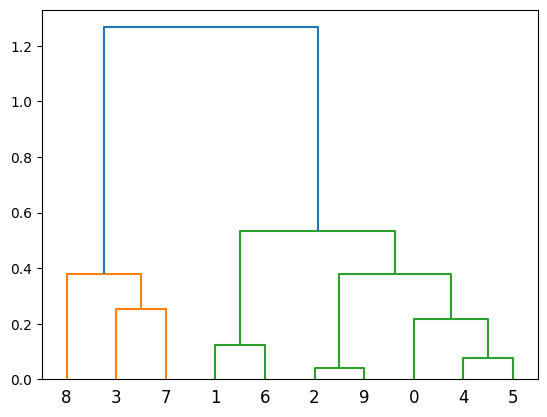

In [42]:
wardlink = linkage(ClusteringCleansData, method = 'ward')
dend = dendrogram(wardlink)

In [43]:
pip install jupyterlab


Note: you may need to restart the kernel to use updated packages.


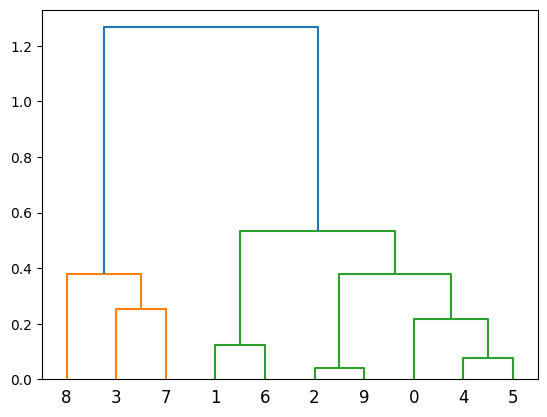

In [44]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )


Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

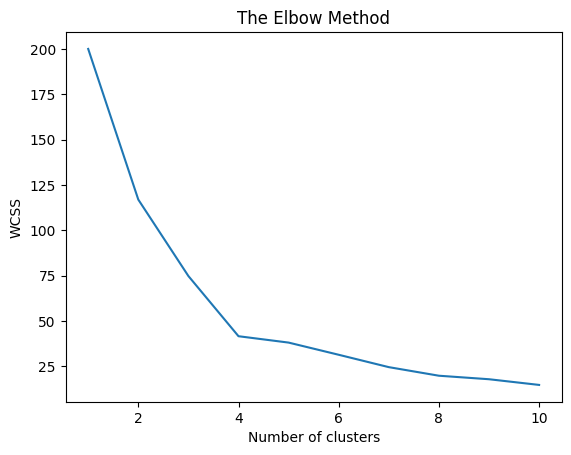

In [46]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming ClusteringCleansData is your DataFrame
# Sample DataFrame (replace this with your own DataFrame)
# Here I'm generating random data as an example
ClusteringCleansData = pd.DataFrame(np.random.rand(100, 2), columns=['Feature1', 'Feature2'])

# Assuming you want to scale your data before clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(ClusteringCleansData)

# Initialize an empty list to store the within-cluster sum of squares
wcss = []

# Determine WCSS for different number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [47]:
from sklearn.metrics import silhouette_score

for n_cluster in range(2, 11):

    kmeans = KMeans(n_clusters=n_cluster).fit(data_scaled)

    label = kmeans.labels_

    sil_coeff = silhouette_score(data_scaled, label, metric='euclidean')

    print("For no of clusters={}, The Silhouette Score is {}".format(n_cluster, sil_coeff))

D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For no of clusters=2, The Silhouette Score is 0.40773786888915725
For no of clusters=3, The Silhouette Score is 0.424018473616722


D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For no of clusters=4, The Silhouette Score is 0.4487735702213934
For no of clusters=5, The Silhouette Score is 0.3891281049588867


D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For no of clusters=6, The Silhouette Score is 0.42036197716812296
For no of clusters=7, The Silhouette Score is 0.4286249480307653


D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For no of clusters=8, The Silhouette Score is 0.36729765765393774
For no of clusters=9, The Silhouette Score is 0.4141023003472272
For no of clusters=10, The Silhouette Score is 0.39287134021730913


D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Profile the ads based on optimum number of clusters using silhouette score and your domain understanding.

D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

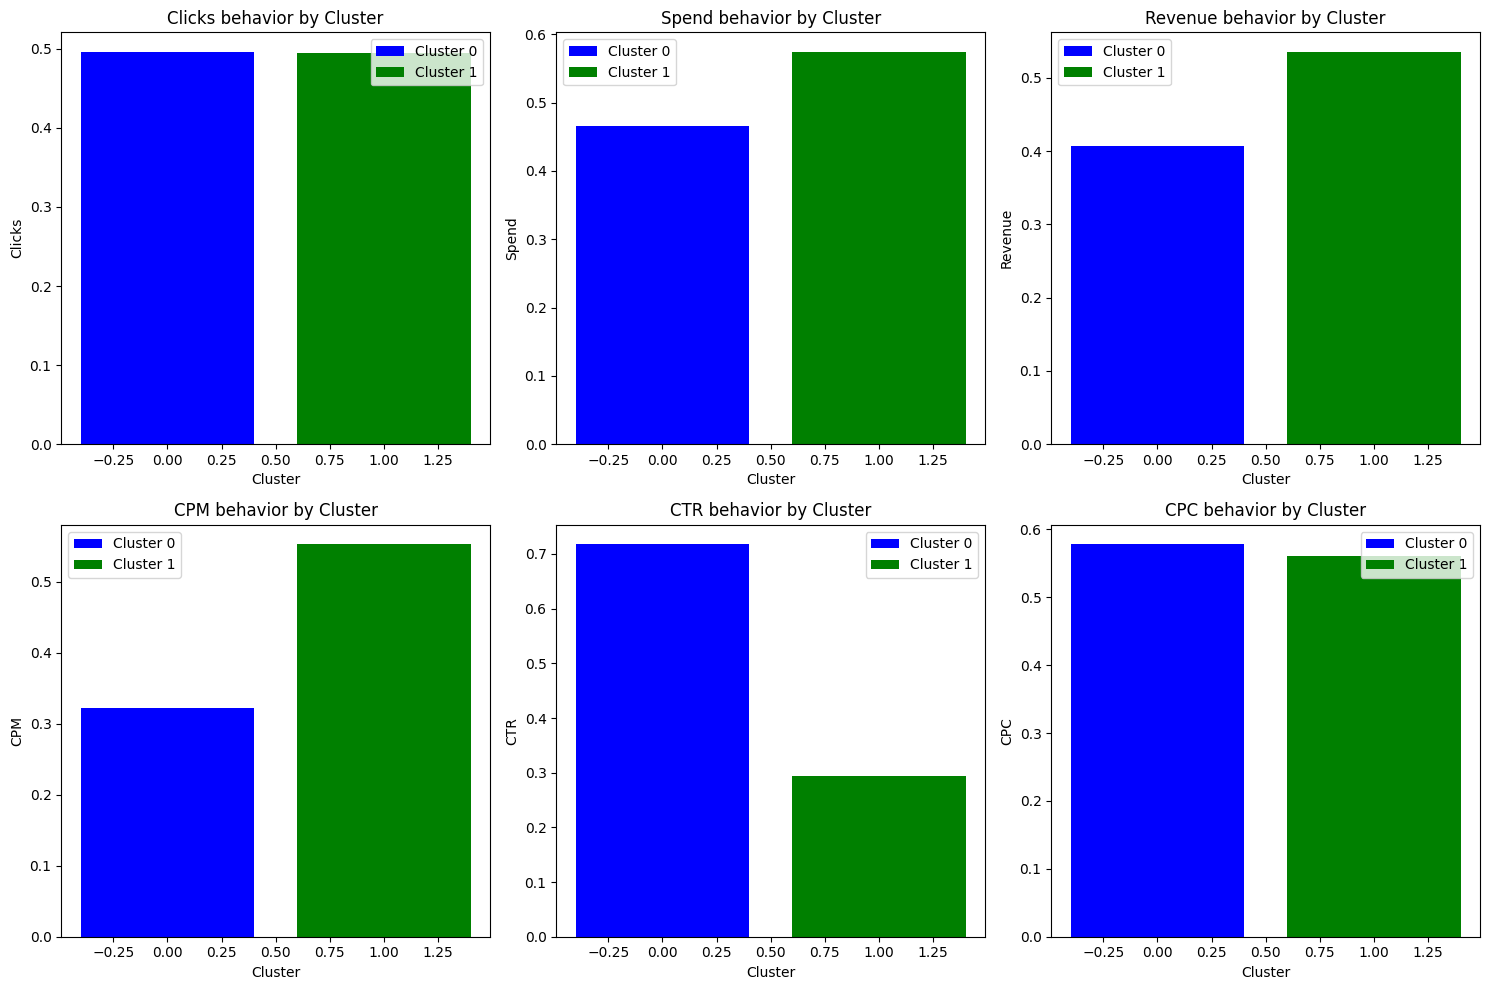

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Assuming ClusteringCleansData is your DataFrame
# Sample DataFrame (replace this with your own DataFrame)
# Here I'm generating random data as an example
ClusteringCleansData = pd.DataFrame(np.random.rand(100, 6), columns=['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC'])

# Assuming you want to scale your data before clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(ClusteringCleansData)

# Compute silhouette scores for different number of clusters
silhouette_scores = []
for i in range(2, 6):  # Considering clusters from 2 to 5
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Find the optimal number of clusters based on the highest silhouette score
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 because range starts from 2

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
kmeans.fit(data_scaled)

# Add cluster labels to the DataFrame
ClusteringCleansData['cluster'] = kmeans.labels_

# Group by cluster and calculate the mean of each column
cluster_means = ClusteringCleansData.groupby('cluster').mean()

# Plotting the behavior of each feature by cluster
plt.figure(figsize=(15, 10))
for i, column in enumerate(ClusteringCleansData.columns[:-1]):  # Exclude the last column 'cluster'
    plt.subplot(2, 3, i + 1)
    for cluster_label, color in zip(cluster_means.index, ['blue', 'green', 'red', 'purple', 'orange']):
        plt.bar(cluster_label, cluster_means.loc[cluster_label, column], color=color, label=f'Cluster {cluster_label}')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.title(f'{column} behavior by Cluster')
    plt.legend()

plt.tight_layout()
plt.show()

Conclude the project by providing summary of your learnings.
For the first question
The code performs basic data analysis, as there are missing values in CPM,CTR,CPC and there are no duplicates in the dataset.
For the second question
Imputes missing values in the CPM,CTR,CPC.
For the third question
Therea are outliers in the dataset and
For the fourth question
The outliers are treated and the speed of the algorithm is slow as they the string values which are presented in columns needs to be dropped and needed to define a function and inside the function the z-score scaling method is performed by copying the data ,using z-score method and calling the function and then scales the data using z-score scaling.
For the fifth question
dendogram is created using ward method as the ward method is done by importing AgglomerativeClustering using sklearn package.
For the sixth question
An elbow plot is created by the using k means algorithm and importing matplot lib.
For the seventh question
For each k value, it calculates the silhouette score to determine which k value results in the best clustering.
For the eight question
Based on the above analysis, The code profiles the ads based on the optimum number of clusters.it seems that k = 3 is the optimum number of clusters for this dataset. This can be seen from the elbow plot and the silhouette scores.

PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.
2.1)Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [49]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns

In [50]:
IndiaCensusData=pd.read_excel('D:/Ment Class/Practise11/Excel Data/TSF/PowerBI/DWNLDS/CV/MRA Project/MRA Project/XLSX File for practice/IndiaCensusData.xlsx')

In [51]:
IndiaCensusData.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [52]:
IndiaCensusData.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [53]:
IndiaCensusData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [54]:
IndiaCensusData.describe()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,17.114062,320.500000,51222.871875,79940.576563,122372.084375,12309.098438,11942.300000,13820.946875,20778.392188,6191.807813,...,1392.973438,2757.050000,250.889062,558.098438,560.690625,1293.431250,71.379688,200.742188,510.014063,704.778125
std,9.426486,184.896367,48135.405475,73384.511114,113600.717282,11500.906881,11326.294567,14426.373130,21727.887713,9912.668948,...,1489.707052,2788.776676,453.336594,1117.642748,762.578991,1585.377936,107.897627,309.740854,610.603187,910.209225
min,1.000000,1.000000,350.000000,391.000000,698.000000,56.000000,56.000000,0.000000,0.000000,0.000000,...,4.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,9.000000,160.750000,19484.000000,30228.000000,46517.750000,4733.750000,4672.250000,3466.250000,5603.250000,293.750000,...,489.500000,957.250000,47.000000,109.000000,136.500000,298.000000,14.000000,43.000000,161.000000,220.500000
50%,18.000000,320.500000,35837.000000,58339.000000,87724.500000,9159.000000,8663.000000,9591.500000,13709.000000,2333.500000,...,949.000000,1928.000000,114.500000,247.500000,308.000000,717.000000,35.000000,113.000000,326.000000,464.500000
75%,24.000000,480.250000,68892.000000,107918.500000,164251.750000,16520.250000,15902.250000,19429.750000,29180.000000,7658.000000,...,1714.000000,3599.750000,270.750000,568.750000,642.000000,1710.750000,79.000000,240.000000,604.500000,853.500000
max,35.000000,640.000000,310450.000000,485417.000000,750392.000000,96223.000000,95129.000000,103307.000000,156429.000000,96785.000000,...,9875.000000,21611.000000,5775.000000,17153.000000,6116.000000,13714.000000,895.000000,3354.000000,6456.000000,10533.000000


In [55]:
IndiaCensusData.isnull().sum()


State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [56]:
IndiaCensusData.duplicated().sum()


0

There are no duplicate values in the requried dataset.

Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions).
Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

In [57]:
#load the required packages
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

I choose the following 5 variables for detailed exploratory analysis by creating questions.
No_HH,TOT_M, M_06,NON_WORK_M,TOT_F,F_SC
1)What value of ranges has the least values for the no of households?

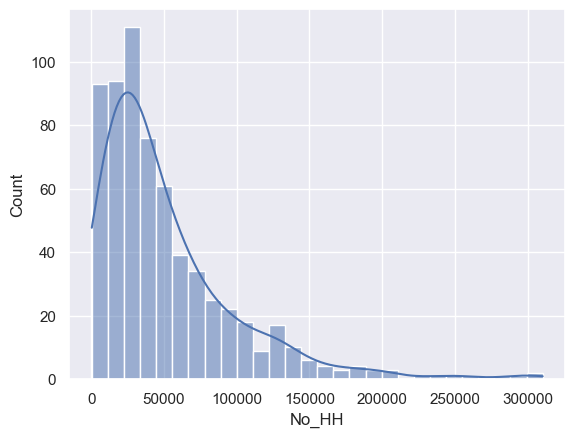

In [58]:
sns.histplot(data=IndiaCensusData, x='No_HH', kde=True);


Whats the relationship between Total population of male and Male Population in the age group 0-6?

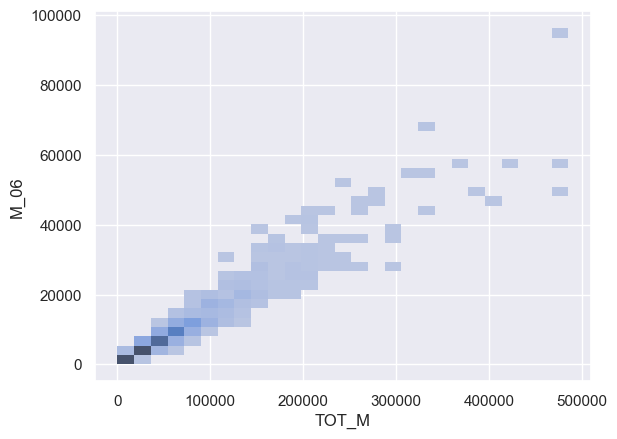

In [59]:
sns.histplot(data=IndiaCensusData, x='TOT_M', y='M_06') ;


The relationship between Total population of male and Male Population in the age group 0-6 is that Total population of male has an increasing rate up to the 300000 value for the Male Population in the age group 0-6 and there are less people at the 300000 to 500000 but they are above the 400000 Male Population in the age group 0-6.

At what range does total population in male has more non working male?

C:\Users\vasan\AppData\Local\Temp\ipykernel_14800\2105180586.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data =IndiaCensusData , x = 'TOT_M' , y = 'NON_WORK_M', ci = False);


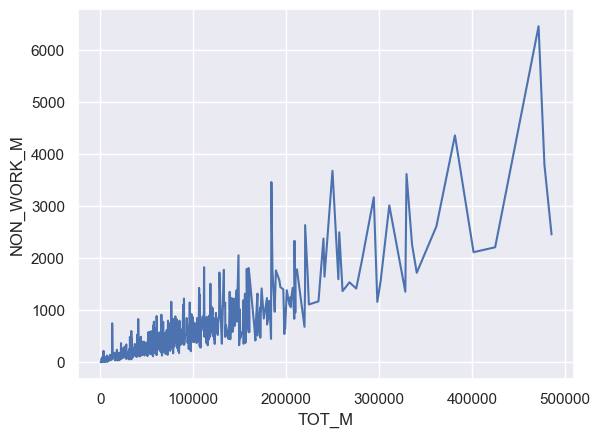

In [60]:
sns.lineplot(data =IndiaCensusData , x = 'TOT_M' , y = 'NON_WORK_M', ci = False);


Which range of total female population has the highest ratio of Female scheduled caste?

C:\Users\vasan\AppData\Local\Temp\ipykernel_14800\21782201.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data = IndiaCensusData , x = 'TOT_F' , y = 'F_SC', ci = False);


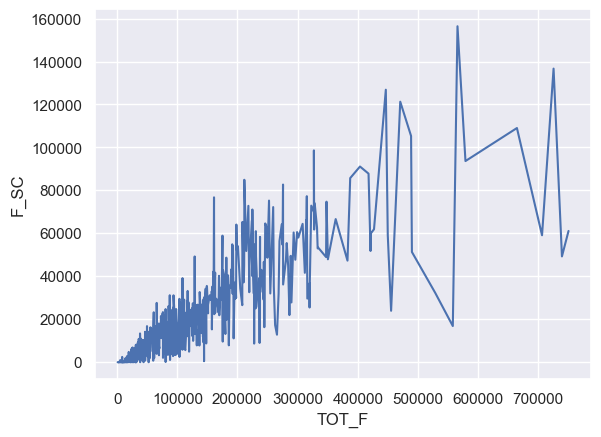

In [61]:
sns.lineplot(data = IndiaCensusData , x = 'TOT_F' , y = 'F_SC', ci = False);


We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?

In [62]:
data1 = IndiaCensusData.drop(['State','Area Name'], axis=1)
data1

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,7707,23388,29796,5862,6196,3,0,1999,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,6218,19585,23102,4482,3733,7,6,427,...,525,715,123,229,186,148,76,178,140,160
2,1,3,4452,6546,10964,1082,1018,3,6,5806,...,114,188,44,89,3,34,0,4,67,61
3,1,4,1320,2784,4206,563,677,0,0,2666,...,194,247,61,128,13,50,4,10,116,59
4,1,5,11654,20591,29981,5157,4587,20,33,7670,...,874,1928,465,1043,205,302,24,105,180,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,34,636,3333,8154,11781,1146,1203,21,30,0,...,32,47,0,0,0,0,0,0,32,47
636,34,637,10612,12346,21691,1544,1533,2234,4155,0,...,155,337,3,14,38,130,4,23,110,170
637,35,638,1275,1549,2630,227,225,0,0,1012,...,104,134,9,4,2,6,17,47,76,77
638,35,639,3762,5200,8012,723,664,0,0,28,...,136,172,24,44,11,21,1,4,100,103


ValueError: num must be an integer with 1 <= num <= 12, not 13

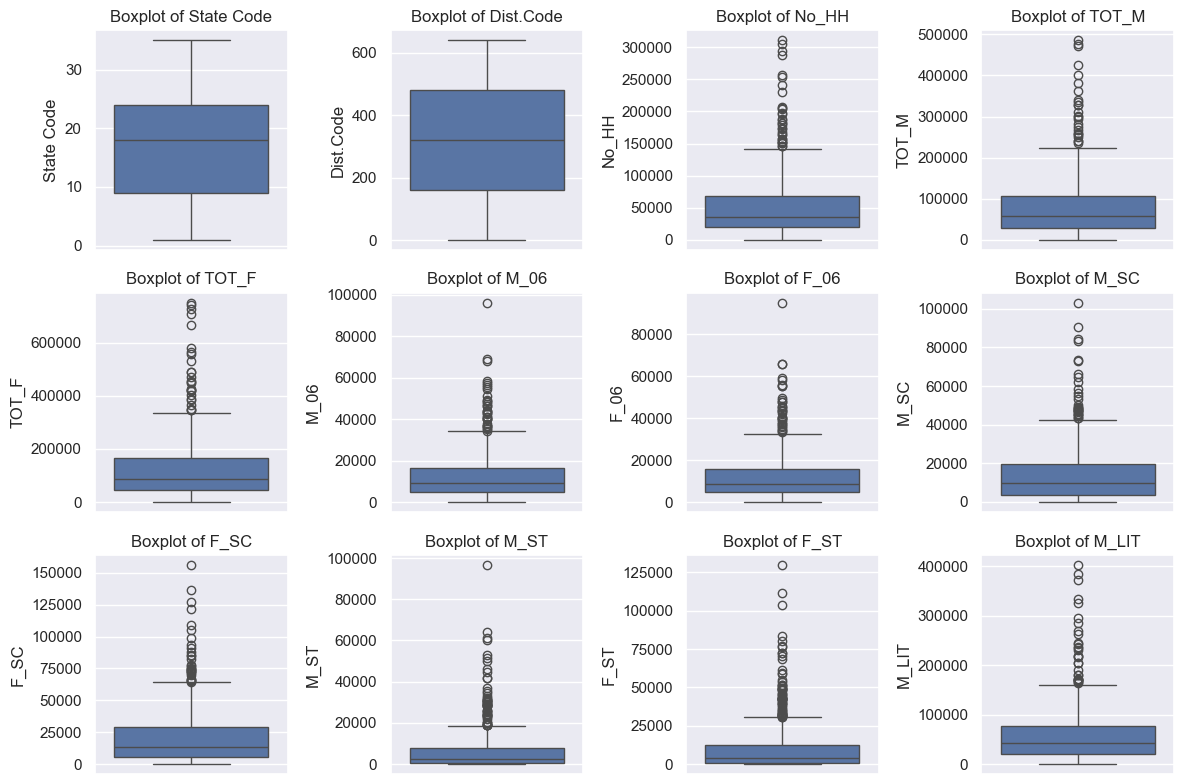

In [63]:
# check for outliers
plt.figure(figsize = (12,8))
feature_list = data1.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = data1[feature_list[i]], data = data1)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [64]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [65]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(data1[i])
    data1[i] = np.where(data1[i] > UL, UL, data1[i])
    data1[i] = np.where(data1[i] < LL, LL, data1[i])

ValueError: num must be an integer with 1 <= num <= 12, not 13

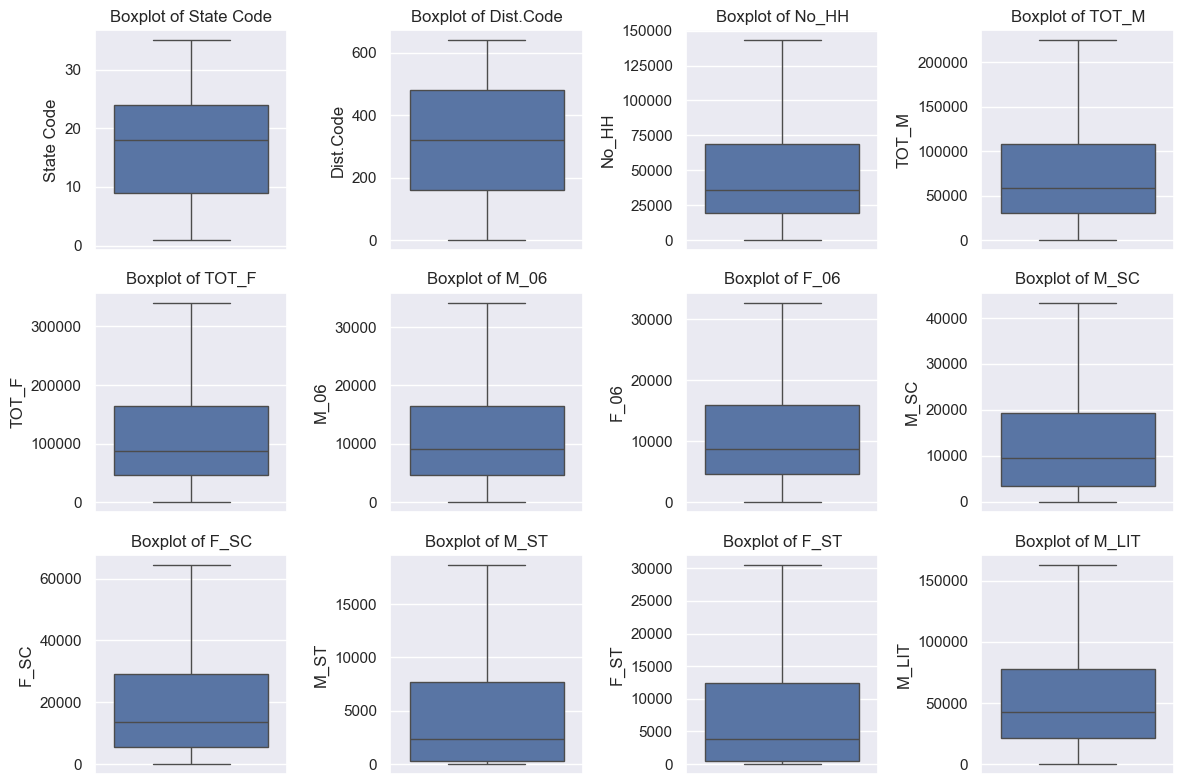

In [66]:
#Check to verify if outliers have been treated
plt.figure(figsize = (12,8))
feature_list = data1.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = data1[feature_list[i]], data = data1)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

In [67]:
data1 =IndiaCensusData.drop(['State','Area Name'], axis=1)
data1

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,7707,23388,29796,5862,6196,3,0,1999,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,6218,19585,23102,4482,3733,7,6,427,...,525,715,123,229,186,148,76,178,140,160
2,1,3,4452,6546,10964,1082,1018,3,6,5806,...,114,188,44,89,3,34,0,4,67,61
3,1,4,1320,2784,4206,563,677,0,0,2666,...,194,247,61,128,13,50,4,10,116,59
4,1,5,11654,20591,29981,5157,4587,20,33,7670,...,874,1928,465,1043,205,302,24,105,180,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,34,636,3333,8154,11781,1146,1203,21,30,0,...,32,47,0,0,0,0,0,0,32,47
636,34,637,10612,12346,21691,1544,1533,2234,4155,0,...,155,337,3,14,38,130,4,23,110,170
637,35,638,1275,1549,2630,227,225,0,0,1012,...,104,134,9,4,2,6,17,47,76,77
638,35,639,3762,5200,8012,723,664,0,0,28,...,136,172,24,44,11,21,1,4,100,103


In [68]:
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    
# call the z_score function
data2 = z_score(data1)

data2

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.709445,-1.727995,-0.904030,-0.770634,-0.814925,-0.560573,-0.507342,-0.957825,-0.956301,-0.422975,...,-0.163101,-0.720047,-0.156372,-0.287300,0.156455,-0.656898,-0.364973,-0.499586,-0.412730,-0.539193
1,-1.709445,-1.722587,-0.934964,-0.822457,-0.873851,-0.680564,-0.724800,-0.957548,-0.956024,-0.581560,...,-0.582647,-0.732239,-0.282106,-0.294458,-0.491347,-0.722497,0.042821,-0.073423,-0.605981,-0.598520
2,-1.709445,-1.717178,-0.971652,-1.000137,-0.980699,-0.976192,-0.964508,-0.957825,-0.956024,-0.038921,...,-0.858540,-0.921210,-0.456370,-0.419721,-0.731322,-0.794404,-0.661550,-0.635183,-0.725535,-0.707286
3,-1.709445,-1.711770,-1.036719,-1.051401,-1.040188,-1.021319,-0.994615,-0.958033,-0.956301,-0.355687,...,-0.804838,-0.900054,-0.418870,-0.384826,-0.718208,-0.784312,-0.624478,-0.615812,-0.645287,-0.709483
4,-1.709445,-1.706361,-0.822033,-0.808748,-0.813297,-0.621873,-0.649400,-0.956647,-0.954782,0.149122,...,-0.348373,-0.297281,0.472300,0.433861,-0.466431,-0.625360,-0.439117,-0.309104,-0.540472,-0.249149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.791329,1.706361,-0.994899,-0.978225,-0.973507,-0.970628,-0.948174,-0.956578,-0.954920,-0.624636,...,-0.913585,-0.971770,-0.553428,-0.499353,-0.735256,-0.815850,-0.661550,-0.648097,-0.782855,-0.722667
636,1.791329,1.711770,-0.843680,-0.921101,-0.886272,-0.936022,-0.919038,-0.803178,-0.765072,-0.624636,...,-0.831018,-0.867782,-0.546810,-0.486827,-0.685425,-0.733851,-0.624478,-0.573842,-0.655113,-0.587533
637,1.897413,1.717178,-1.037653,-1.068231,-1.054061,-1.050534,-1.034522,-0.958033,-0.956301,-0.522544,...,-0.865253,-0.940574,-0.533575,-0.495774,-0.732633,-0.812066,-0.503993,-0.496357,-0.710796,-0.689707
638,1.897413,1.722587,-0.985987,-1.018479,-1.006685,-1.007407,-0.995763,-0.958033,-0.956301,-0.621811,...,-0.843772,-0.926948,-0.500487,-0.459985,-0.720831,-0.802604,-0.652282,-0.635183,-0.671490,-0.661143


ValueError: num must be an integer with 1 <= num <= 12, not 13

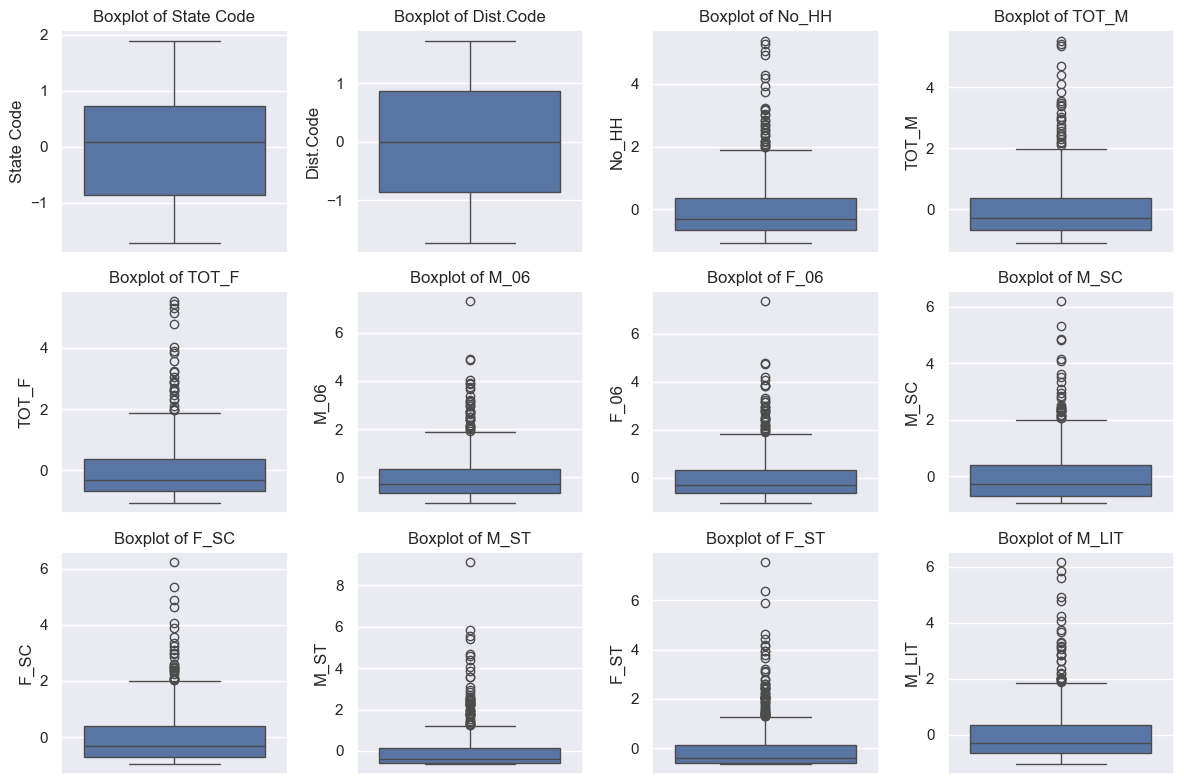

In [70]:
# check for outliers
plt.figure(figsize = (12,8))
feature_list = data2.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = data2[feature_list[i]], data = data2)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.


In [71]:
pip install factor_analyzer


     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.8 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.8 kB 330.3 kB/s eta 0:00:01
     ------------------------------------ - 41.0/42.8 kB 326.8 kB/s eta 0:00:01
     -------------------------------------- 42.8/42.8 kB 231.1 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.8 kB 653.6 kB/s eta 0:00:01
   ------- -----------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


In [72]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data2)
p_value

D:\Users\vasan\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


0.0

In [73]:
data2.dropna(inplace=True)


In [74]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data2)
kmo_model

D:\Users\vasan\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.8053442139017214

In [75]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state=123)
pca_transformed = pca.fit_transform(data2)

In [76]:
#Extract eigen vectors
pca.components_

array([[ 3.00700521e-02,  3.00751392e-02,  1.56432451e-01,
         1.67038499e-01,  1.65701886e-01,  1.61870848e-01,
         1.62266320e-01,  1.51067631e-01,  1.51483487e-01,
         2.76635864e-02,  2.86559949e-02,  1.62028968e-01,
         1.47117900e-01,  1.61354631e-01,  1.65216191e-01,
         1.59988739e-01,  1.46484663e-01,  1.46446784e-01,
         1.24700922e-01,  1.02841551e-01,  7.46387972e-02,
         1.13762012e-01,  7.47868720e-02,  1.31280497e-01,
         8.36015471e-02,  1.23789890e-01,  1.11498595e-01,
         1.64144005e-01,  1.55258801e-01,  8.14703494e-02,
         4.84108523e-02,  1.28166982e-01,  1.14462067e-01,
         1.40274353e-01,  1.27424449e-01,  1.55154856e-01,
         1.47413552e-01,  1.64714317e-01,  1.61211005e-01,
         1.65089659e-01,  1.55618244e-01,  9.21330578e-02,
         5.07812312e-02,  1.28188765e-01,  1.10910853e-01,
         1.39029295e-01,  1.24330759e-01,  1.54196780e-01,
         1.46411774e-01,  1.49444956e-01,  1.39705021e-0

In [77]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([31.81763348,  8.17627518,  4.5356532 ,  3.83736258,  2.2675094 ,
        1.9568635 ,  1.37333087,  0.8859562 ,  0.71877312,  0.61310009,
        0.49362719,  0.42348526])

In [78]:
covmatrix = print('NumPy covariance matrix: \n%s' %np.cov(data2.T))
covmatrix

NumPy covariance matrix: 
[[1.         0.99302133 0.38442454 ... 0.03404446 0.12552829 0.23172208]
 [0.99302133 1.         0.37697095 ... 0.03329085 0.11209242 0.21280216]
 [0.38442454 0.37697095 1.         ... 0.53685418 0.76238413 0.73569246]
 ...
 [0.03404446 0.03329085 0.53685418 ... 1.         0.6095693  0.52109686]
 [0.12552829 0.11209242 0.76238413 ... 0.6095693  1.         0.88090162]
 [0.23172208 0.21280216 0.73569246 ... 0.52109686 0.88090162 1.        ]]


Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

In [79]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.53928192, 0.13858094, 0.07687548, 0.06504004, 0.03843236,
       0.03316718, 0.02327679, 0.01501621, 0.0121826 , 0.01039153,
       0.00836656, 0.00717772])

In [80]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'],
                                    index = data2.columns)

In [81]:
df_extracted_loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
State Code,0.030070,-0.162783,-0.250129,0.120049,0.145753,0.090244,-0.352205,-0.386295,0.181864,0.037733,0.159750,0.081100
Dist.Code,0.030075,-0.158822,-0.259360,0.110852,0.136167,0.079450,-0.351971,-0.392440,0.203407,0.065440,0.149476,0.060769
No_HH,0.156432,-0.128322,-0.033498,0.101335,-0.022504,-0.000996,-0.054283,0.116661,0.020509,0.000216,0.022453,-0.000029
TOT_M,0.167038,-0.080861,0.063630,0.033299,-0.049227,-0.074100,0.069576,-0.007883,0.117189,0.030459,-0.004240,-0.008208
TOT_F,0.165702,-0.101111,0.024403,0.071948,-0.027928,-0.046350,0.008746,0.033156,0.086646,0.025439,-0.015019,0.000652
M_06,0.161871,-0.012753,0.070453,0.007703,-0.069415,-0.152284,0.088987,-0.088322,0.230863,-0.018073,-0.095920,-0.084729
F_06,0.162266,-0.011674,0.063515,0.002417,-0.062113,-0.149228,0.088532,-0.100682,0.239291,-0.016980,-0.104345,-0.083852
M_SC,0.151068,-0.035627,0.035345,-0.024603,-0.185394,-0.045912,0.015994,0.079119,-0.239926,-0.037393,0.329603,0.256582
F_SC,0.151483,-0.047732,-0.009677,0.002284,-0.170823,-0.022720,-0.043008,0.113026,-0.259835,-0.033859,0.339877,0.251012
M_ST,0.027664,0.008893,-0.201756,0.142128,0.372538,0.110757,0.504502,-0.061719,0.001861,0.001838,0.159830,-0.045772


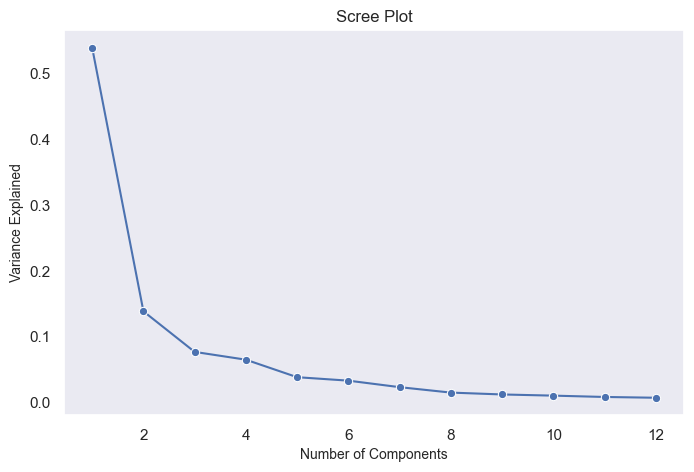

In [82]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,13),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

By looking at the plots we see a more or less pronounced drop off (elbow in the scree plot) after the third principal component. Thus, based on the scree plot we would decide to pick the first three principal component to represent our data set, thereby explaining 93% of the variance in the data set.

Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

In [83]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.53928192, 0.67786286, 0.75473834, 0.81977838, 0.85821074,
       0.89137792, 0.91465472, 0.92967092, 0.94185352, 0.95224504,
       0.96061161, 0.96778932])

In [84]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]

In [86]:
#Check the selected PCs
df_selected

,PC1,PC2,PC3,PC4,PC5
State Code,0.030070,-0.162783,-0.250129,0.120049,0.145753
Dist.Code,0.030075,-0.158822,-0.259360,0.110852,0.136167
No_HH,0.156432,-0.128322,-0.033498,0.101335,-0.022504
TOT_M,0.167038,-0.080861,0.063630,0.033299,-0.049227
TOT_F,0.165702,-0.101111,0.024403,0.071948,-0.027928
M_06,0.161871,-0.012753,0.070453,0.007703,-0.069415
F_06,0.162266,-0.011674,0.063515,0.002417,-0.062113
M_SC,0.151068,-0.035627,0.035345,-0.024603,-0.185394
F_SC,0.151483,-0.047732,-0.009677,0.002284,-0.170823
M_ST,0.027664,0.008893,-0.201756,0.142128,0.372538


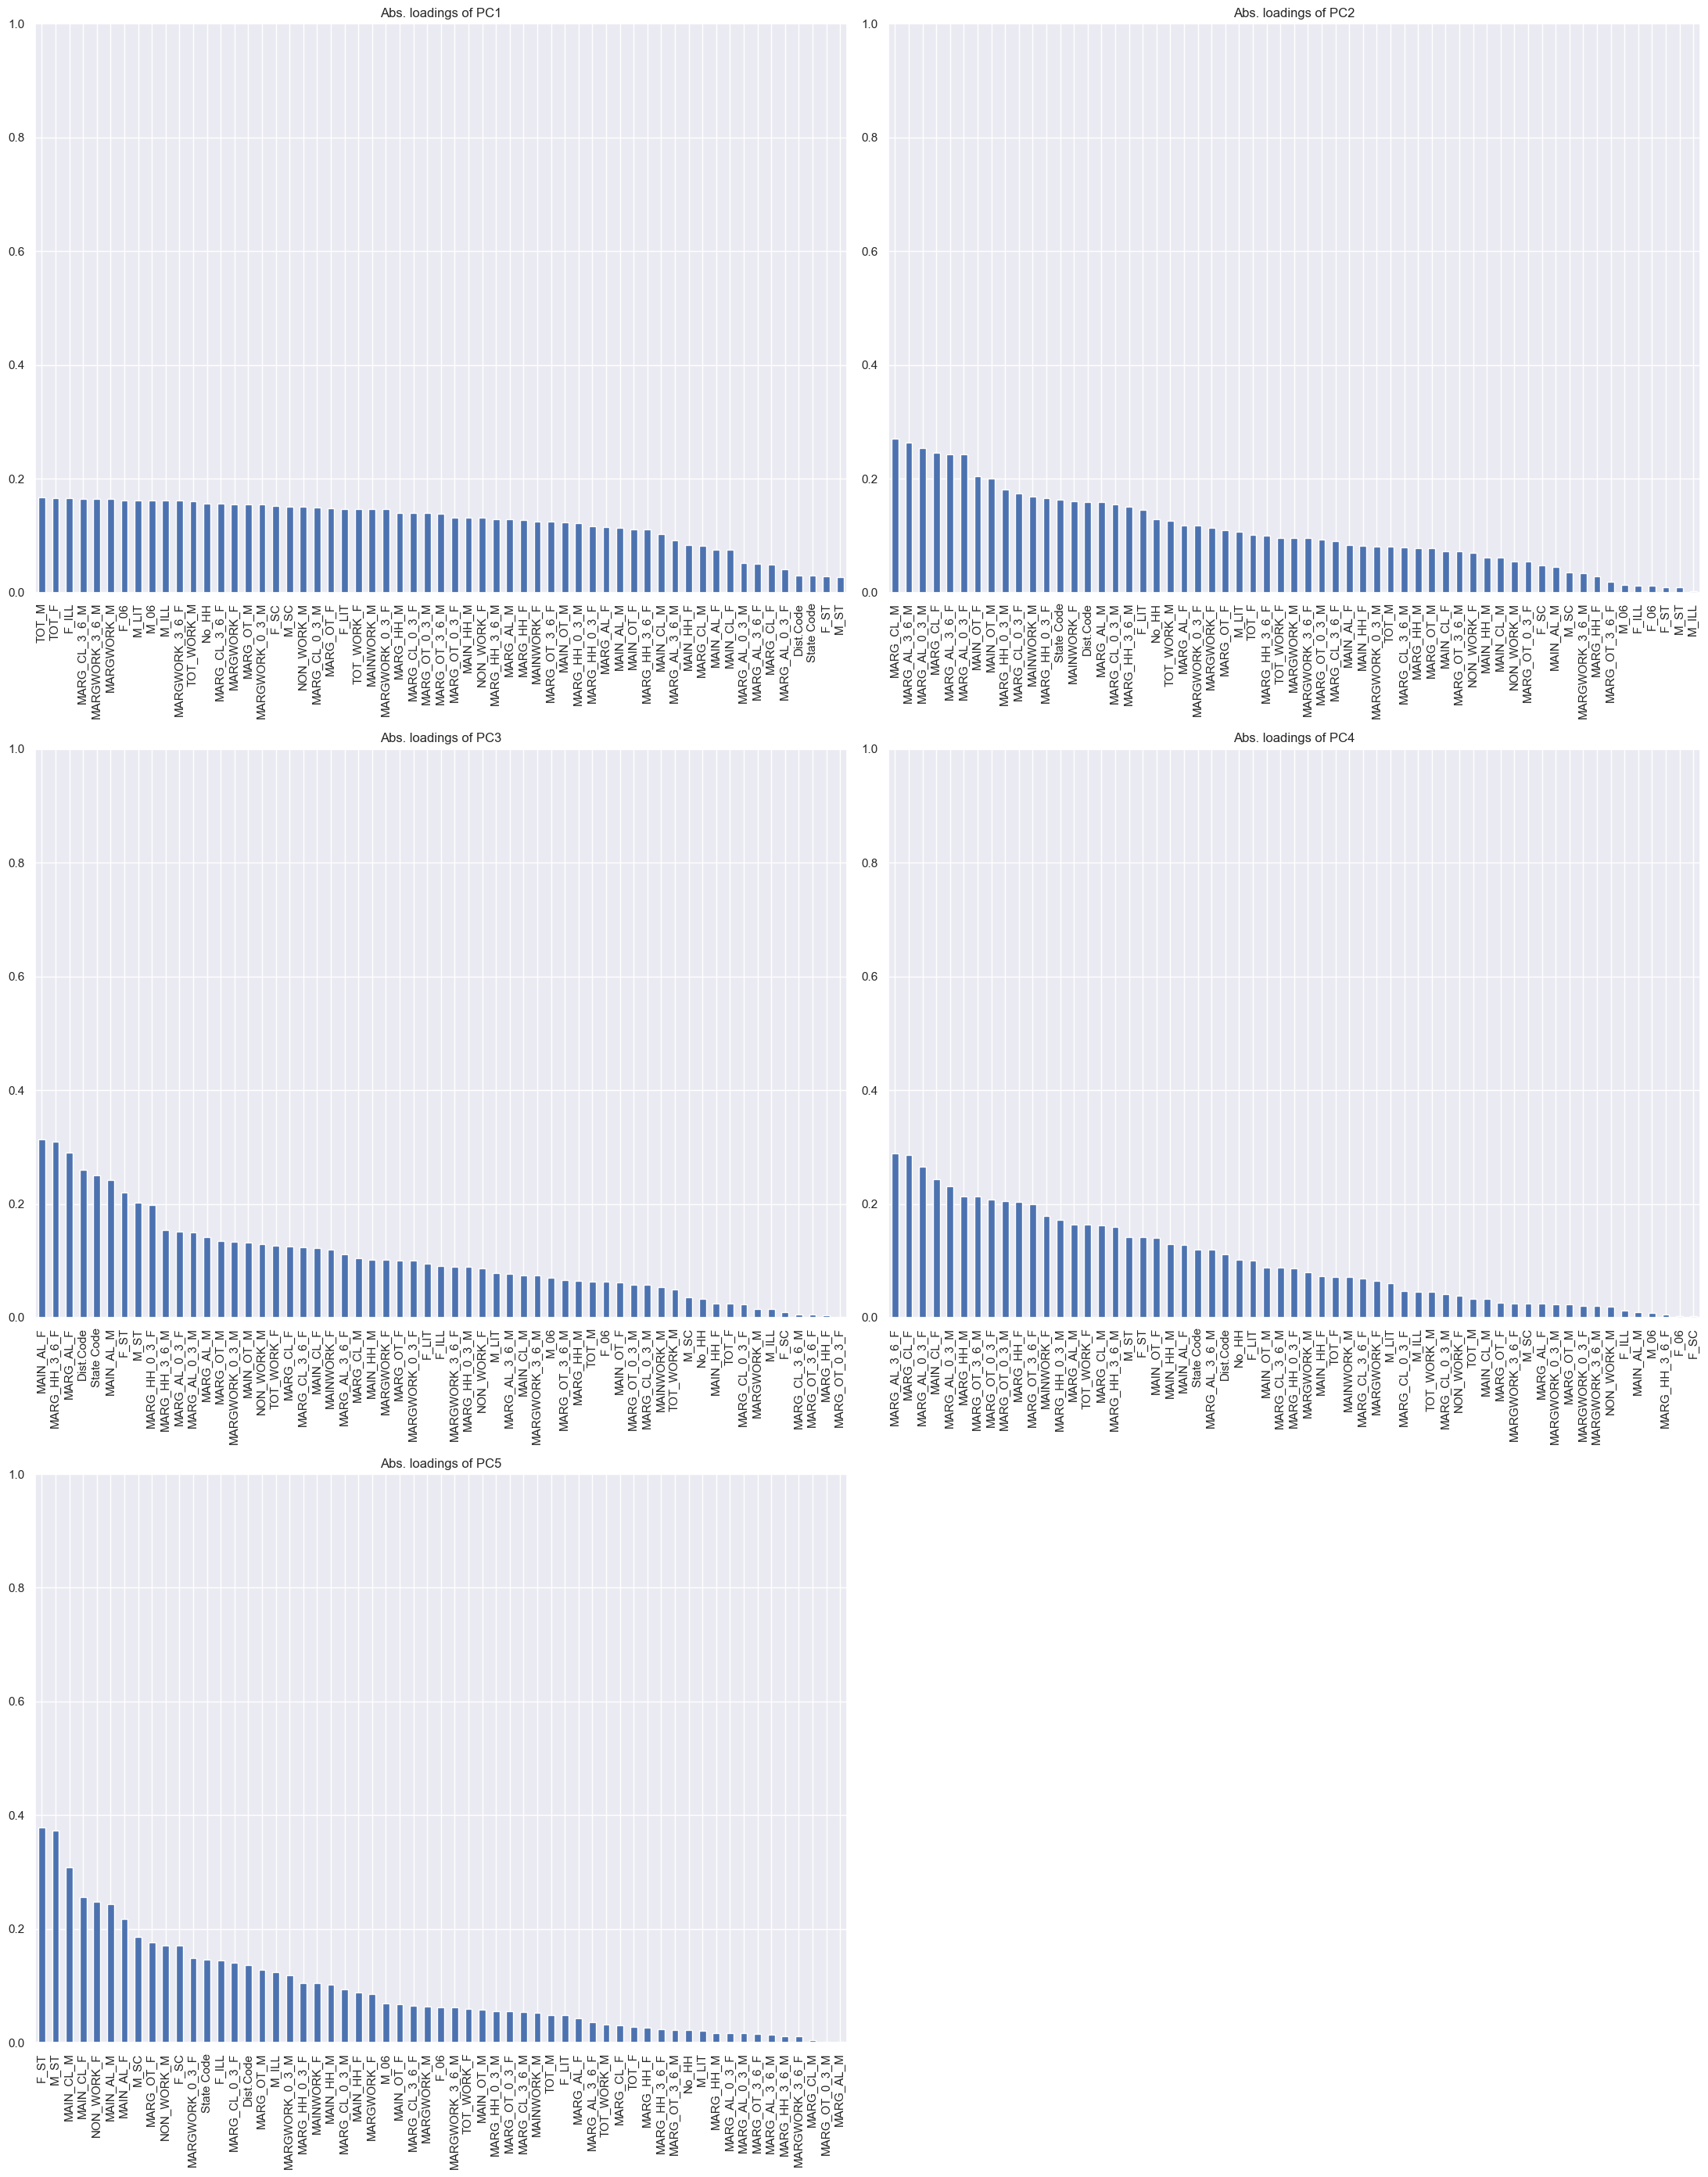

In [87]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (22,28))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

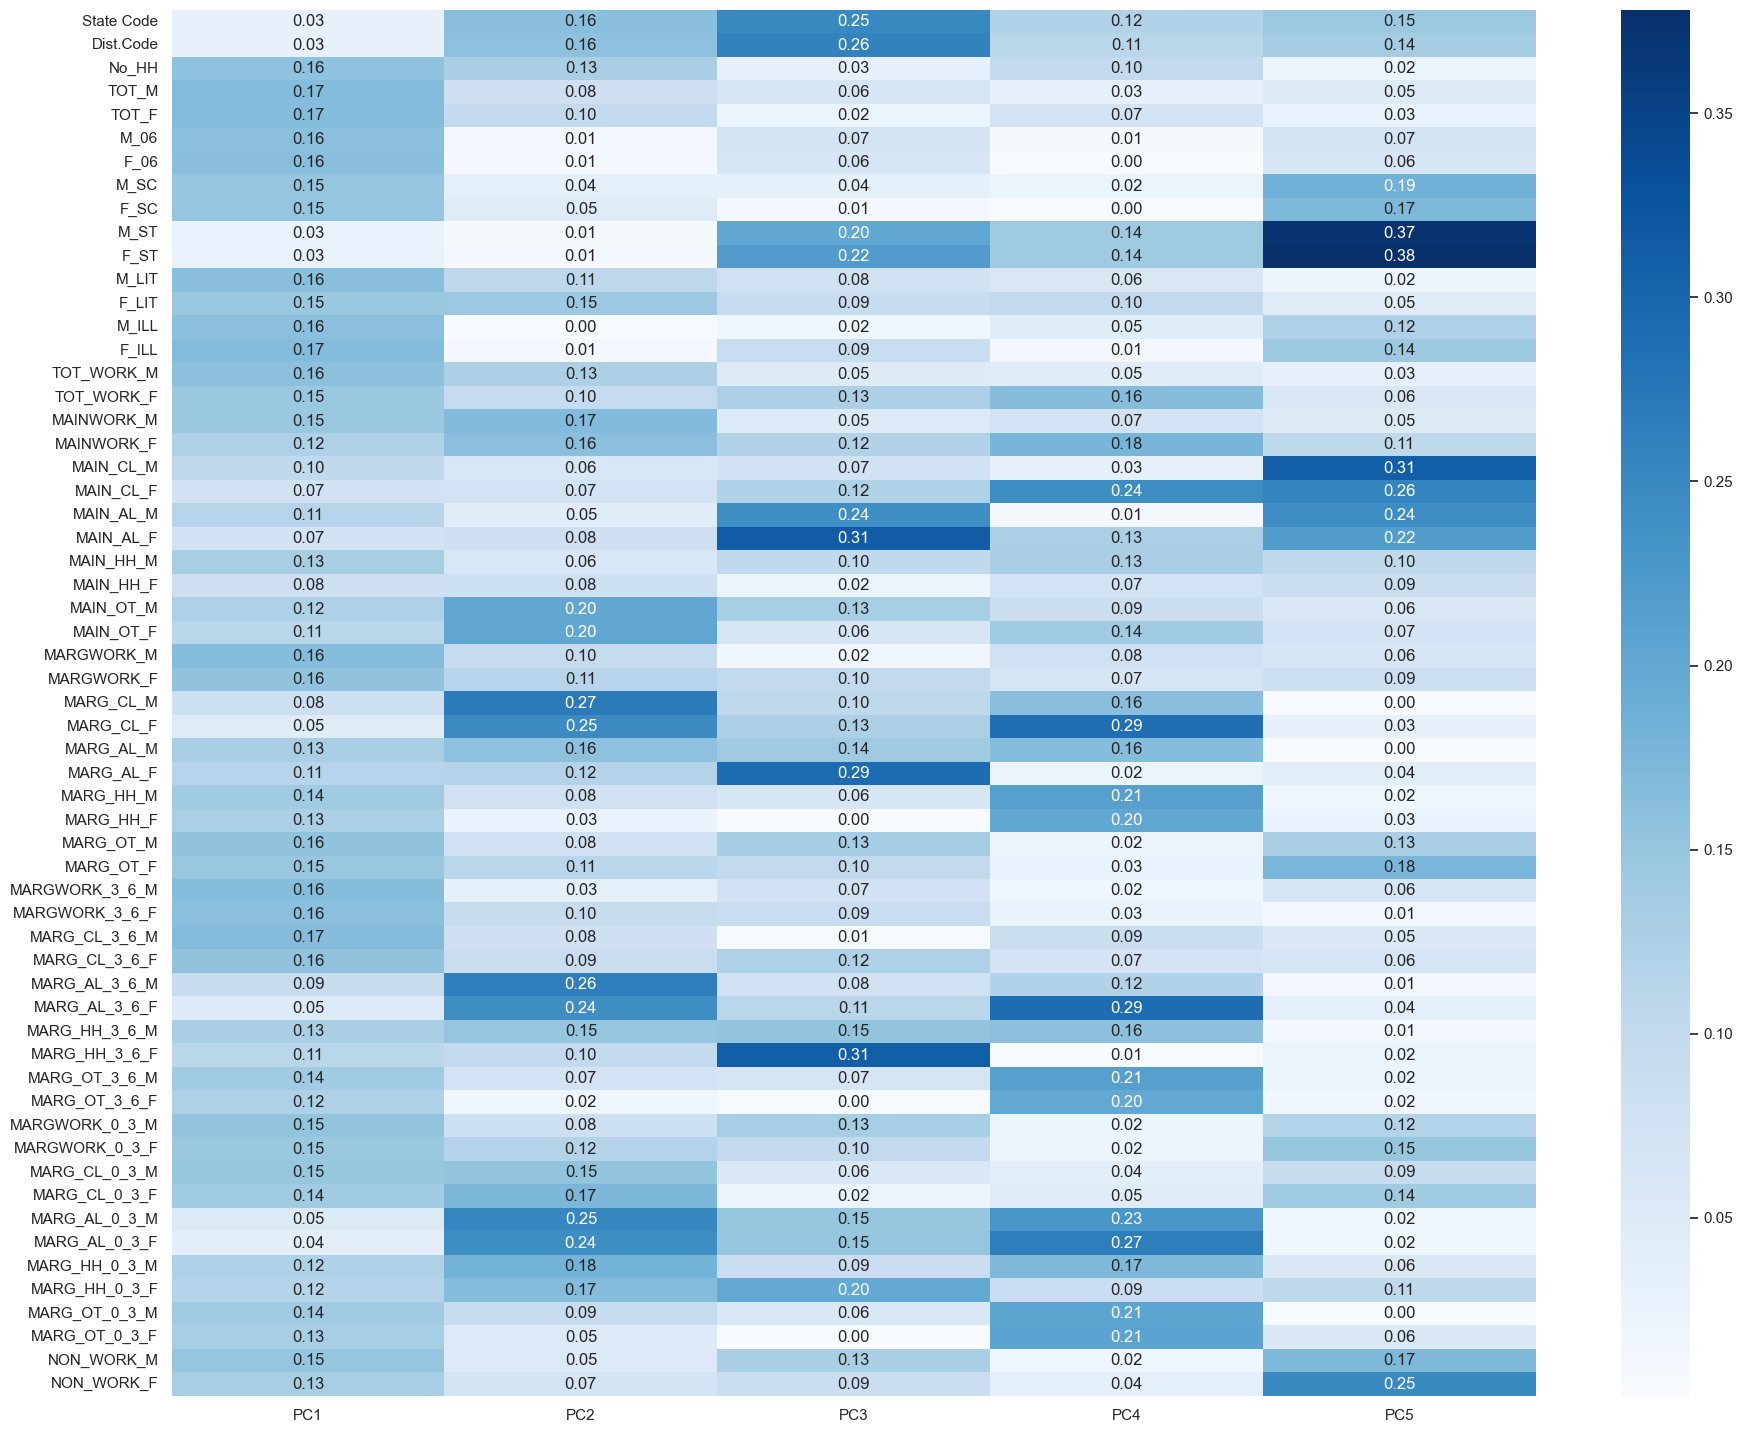

In [88]:
#Compare how the original features influence various PCs
plt.figure(figsize = (22,18))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

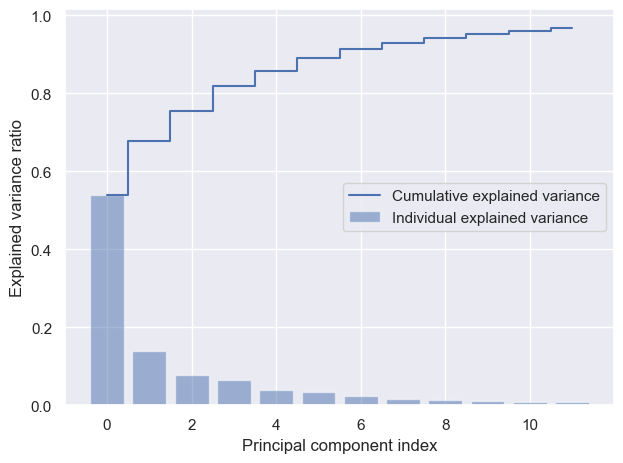

In [89]:
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [90]:
#In order to calculate PC scores we need loadings, below:
df_selected

,PC1,PC2,PC3,PC4,PC5
State Code,0.030070,-0.162783,-0.250129,0.120049,0.145753
Dist.Code,0.030075,-0.158822,-0.259360,0.110852,0.136167
No_HH,0.156432,-0.128322,-0.033498,0.101335,-0.022504
TOT_M,0.167038,-0.080861,0.063630,0.033299,-0.049227
TOT_F,0.165702,-0.101111,0.024403,0.071948,-0.027928
M_06,0.161871,-0.012753,0.070453,0.007703,-0.069415
F_06,0.162266,-0.011674,0.063515,0.002417,-0.062113
M_SC,0.151068,-0.035627,0.035345,-0.024603,-0.185394
F_SC,0.151483,-0.047732,-0.009677,0.002284,-0.170823
M_ST,0.027664,0.008893,-0.201756,0.142128,0.372538


In [91]:
#...and we need the original scaled features
data2.iloc[0]

State Code       -1.709445
Dist.Code        -1.727995
No_HH            -0.904030
TOT_M            -0.770634
TOT_F            -0.814925
M_06             -0.560573
F_06             -0.507342
M_SC             -0.957825
F_SC             -0.956301
M_ST             -0.422975
F_ST             -0.476051
M_LIT            -0.797474
F_LIT            -0.732904
M_ILL            -0.603543
F_ILL            -0.797605
TOT_WORK_M       -0.858589
TOT_WORK_F       -1.009448
MAINWORK_M       -0.871685
MAINWORK_F       -0.897514
MAIN_CL_M        -1.042029
MAIN_CL_F        -0.985859
MAIN_AL_M        -0.850395
MAIN_AL_F        -0.682742
MAIN_HH_M        -0.630273
MAIN_HH_F        -0.407236
MAIN_OT_M        -0.623554
MAIN_OT_F        -0.611159
MARGWORK_M       -0.516539
MARGWORK_F       -0.965756
MARG_CL_M        -0.321557
MARG_CL_F        -0.484674
MARG_AL_M        -0.331167
MARG_AL_F        -0.859520
MARG_HH_M        -0.377689
MARG_HH_F        -0.452672
MARG_OT_M        -0.548335
MARG_OT_F        -0.614145
M

In [92]:
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=5, random_state=123)
pca_final = pca.fit_transform(data2)

In [93]:
#Just create a dataframe out of fit_transformed scaled data above
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5
0,-4.715692,0.716943,1.630990,-1.523792,0.090186
1,-4.869488,0.491616,1.750757,-1.937018,-0.262767
2,-6.058209,0.233568,1.332026,-0.709717,0.152049
3,-6.373402,0.042733,1.403275,-1.186744,0.013910
4,-4.577678,1.430483,1.721150,-0.231543,0.579122
5,-3.426771,3.367870,2.723809,1.661027,0.710467
6,-5.116802,0.230806,1.757886,-0.916492,-0.343109
7,-4.705798,0.602123,1.705014,-1.519110,-0.033904
8,-5.282165,0.506280,1.567434,-1.745013,0.037702
9,-4.320470,-0.704902,2.106949,-1.355014,0.027899


Inferences:
Explained variance represents the information explained using different principal components (eigenvectors) Explained variance is calculated as ratio of eigenvalue of a articular principal component (eigenvector) with total eigenvalues. Explained variance can be calculated as the attribute explained_variance_ratio_ of PCA instance created using sklearn.decomposition PCA class.

2.8)Write linear equation for first PC.

In [94]:
#You can use the numpy library to calculate the first principal component of a linear equation.

import numpy as np

# inputs
x = pca_final_df["PC1"]
y = pca_final_df["PC2"]

# mean of inputs
x_mean = np.mean(x)
y_mean = np.mean(y)

# calculate the first principal component
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)

slope = numerator / denominator
intercept = y_mean - (slope * x_mean)

print("The first principal component is: y = {:.2f}x + {:.2f}".format(slope, intercept))

The first principal component is: y = -0.00x + -0.00
